In [1]:
from draw3d import *

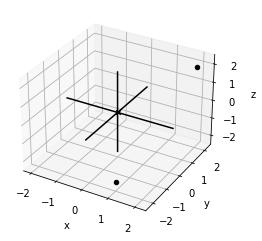

In [2]:
draw3d(
    Points3D((2,2,2), (1,-2,-2))
)

/Users/jtrezza/projects/math-for-programmers/draw3d.py:19: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


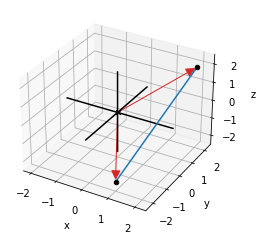

In [3]:
draw3d(
    Points3D((2,2,2), (1,-2,-2)),
    Arrow3D((2,2,2)),
    Arrow3D((1,-2,-2)),
    Segment3D((2,2,2), (1,-2,-2))
)

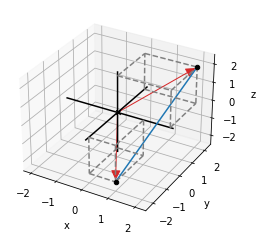

In [4]:
draw3d(
    Points3D((2,2,2), (1,-2,-2)),
    Arrow3D((2,2,2)),
    Arrow3D((1,-2,-2)),
    Segment3D((2,2,2), (1,-2,-2)),
    Box3D(2,2,2),
    Box3D(1,-2,-2)
)

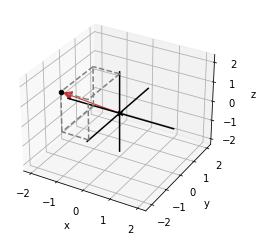

In [5]:
draw3d(
    Points3D((-1,-2,2)),
    Arrow3D((-1,-2,2)),
    Box3D(-1,-2,2)
)

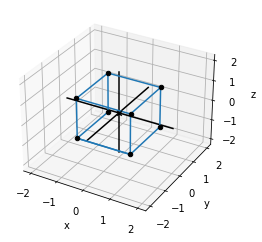

In [6]:
draw3d(
    Points3D((-1,-1,-1),(-1,-1,1),(-1,1,1),(1,1,1),(-1,1,-1),(1,-1,-1),(1,-1,1),(1,1,-1)),
    Segment3D((1,1,1), (1,1,-1)),
    Segment3D((1,1,1), (1,-1,1)),
    Segment3D((1,1,1), (-1,1,1)),
    Segment3D((-1,1,1), (-1,1,-1)),
    Segment3D((-1,1,1), (-1,-1,1)),
    Segment3D((-1,-1,1), (-1,-1,-1)),
    Segment3D((-1,-1,-1), (-1,1,-1)),
    Segment3D((-1,-1,-1), (1,-1,-1)),
    Segment3D((1,1,-1), (1,-1,-1)),
    Segment3D((1,-1,1), (1,-1,-1)),
    Segment3D((-1,-1,1), (1,-1,1)),
    Segment3D((-1,-1,-1), (1,-1,-1))
)

## Sum of vectors
e.g: (2,1,1)+(1,2,2)=(3,3,3)
or (1,2,2)+(2,1,1)=(3,3,3)

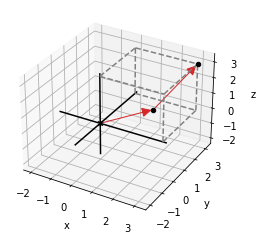

In [7]:
draw3d(
    Points3D((2,1,1), (3,3,3)),
    Arrow3D((2,1,1)),    
    Arrow3D((3,3,3),(2,1,1)),
    Box3D(3,3,3)
)

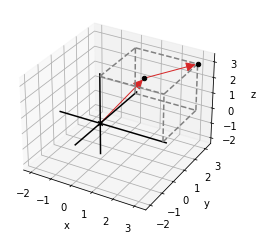

In [8]:
draw3d(
    Points3D((1,2,2), (3,3,3)),
    Arrow3D((1,2,2)),    
    Arrow3D((3,3,3),(1,2,2)),
    Box3D(3,3,3)
)

In [9]:
def add(*vectors):
    by_coordinate = zip(*vectors)
    coordinate_sums = [sum(coords) for coords in by_coordinate]
    return tuple(coordinate_sums)

In [10]:
add((1,1,2),(2,2,1))

(3, 3, 3)

In [11]:
from math import sqrt

def length(v):
    return sqrt(sum([coord**2 for coord in v]))

In [12]:
length((3,4,12))

13.0

In [13]:
def scale(s, v):
    return tuple(s * coord for coord in v)

In [14]:
scale(2, (1,2,3))

(2, 4, 6)

In [15]:
def dot(u, v):
    return sum([a*b for a, b in zip(u, v)])

In [17]:
dot((2,4,3),(1,2,5))

25

In [18]:
from math import acos

def angle_between(v1,v2):
    return acos(
        dot(v1,v2) /
        (length(v1) * length(v2))
    )

In [21]:
def cross(u,v):
    ux,uy,uz = u
    vx,vy,vz = v
    return (uy*vz - uz*vy, uz*vx - ux*vz, ux*vy - uy*vx)

In [41]:
octahedron = [
    [(1,0,0), (0,1,0), (0,0,1)],
    [(1,0,0), (0,0,-1), (0,1,0)],
    [(1,0,0), (0,0,1), (0,-1,0)],
    [(1,0,0), (0,-1,0), (0,0,-1)],
    [(-1,0,0), (0,0,1), (0,1,0)],
    [(-1,0,0), (0,1,0), (0,0,-1)],
    [(-1,0,0), (0,-1,0), (0,0,1)],
    [(-1,0,0), (0,0,-1), (0,-1,0)],
]

In [53]:
def vertices(faces):
    return list(set([vertex for face in faces for vertex in face]))

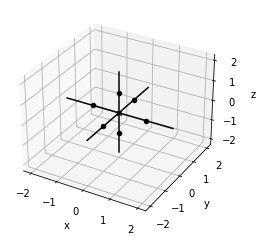

In [43]:
draw3d(
    Points3D(*vertices(octahedron))
)

In [54]:
def component(v,direction):
    return (dot(v,direction) / length(direction))

In [55]:
def vector_to_2d(v):
    return (component(v,(1,0,0)), component(v,(0,1,0)))

In [56]:
def face_to_2d(face):
    return [vector_to_2d(vertex) for vertex in face]

In [57]:
def unit(v):
    return scale(1./length(v), v)

In [63]:
def subtract(v1,v2):
    return tuple(v1-v2 for (v1,v2) in zip(v1,v2))

In [64]:
def normal(face):
    return(cross(subtract(face[1], face[0]), subtract(face[2], face[0])))

In [65]:
blues = matplotlib.cm.get_cmap('Blues')

In [71]:
from vectors import *
from draw2d import *

In [72]:
def render(faces, light=(1,2,3), color_map=blues, lines=None):
    polygons = []
    for face in faces:
        unit_normal = unit(normal(face)) #1
        if unit_normal[2] > 0: #2
            c = color_map(1 - dot(unit(normal(face)), unit(light))) #3
            p = Polygon2D(*face_to_2d(face), fill=c, color=lines) #4
            polygons.append(p)
    draw2d(*polygons,axes=False, origin=False, grid=None)

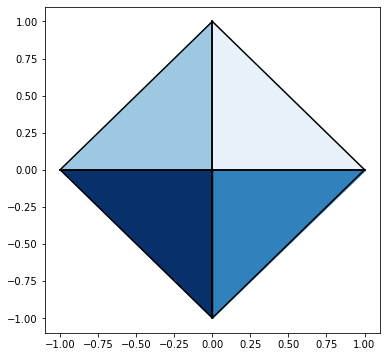

In [73]:
render(octahedron, color_map=matplotlib.cm.get_cmap('Blues'), lines=black)

In [74]:
def split(face):
    midpoints = [unit(add(face[i], face[(i+1)%len(face)])) for i in range(0,len(face))]
    triangles = [(face[i], midpoints[i], midpoints[(i-1)%len(face)]) for i in range(0,len(face))]
    return [midpoints] + triangles

def rec_split(faces, depth=0):
    if depth == 0:
        return faces
    else:
        return rec_split([new_face for face in faces for new_face in split(face)], depth-1)

# NICE SPHERE!
def sphere_approx(n):
    return rec_split(octahedron,n)

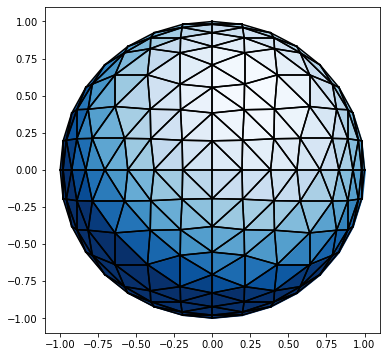

In [75]:
render(sphere_approx(3), lines='k')